# 3. Community Detection

In [ ]:
import praw
import pandas as pd
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import networkx as nx

# load
df_ending = pd.read_csv('../data/aot_ending.csv')
df_comments = pd.read_csv('../data/comments_graph_ending_top30percent_clean.csv')
G = pickle.load(open('../data/comments_graph.pickle', 'rb'))

In [2]:
def community_detection(G, c):
    """
    Community detection utility function
    """
    # number of communities
    print("Number of communities: ", len(c), end="\n\n")

    # size of communities
    community_sizes = [len(community) for community in c]
    for i, size in enumerate(community_sizes, 1):
        print(f"Community {i:>2}: Size {size}")

    # modularity
    print(f"\nModularity: {nx.community.modularity(G, c):.4f}")

    ######
    # create a DataFrame node-community
    l=[]
    i=0

    for community in c:
        for node in community:
            l.append([node,i])
        i+=1

    # create DataFrame
    # IMPORTANT: the order of nodes in the DataFrame is the same as in G.nodes()
    # so we match the communities to the nodes in the graph, for example for the color in the plot
    df = pd.DataFrame(l, columns=['node', 'community'])
    df = df.set_index('node').reindex(G.nodes()).reset_index()

    return df


In [3]:
pos = nx.spring_layout(G, iterations=50)


### Greedy modularity

In [14]:
c_greedy = nx.community.greedy_modularity_communities(G)
df_greedy = community_detection(G, c_greedy)
display(df_greedy.head(7))

Number of communities:  197

Community  1: Size 3164
Community  2: Size 1071
Community  3: Size 624
Community  4: Size 422
Community  5: Size 400
Community  6: Size 376
Community  7: Size 314
Community  8: Size 254
Community  9: Size 233
Community 10: Size 221
Community 11: Size 194
Community 12: Size 187
Community 13: Size 158
Community 14: Size 119
Community 15: Size 103
Community 16: Size 83
Community 17: Size 81
Community 18: Size 80
Community 19: Size 67
Community 20: Size 67
Community 21: Size 61
Community 22: Size 40
Community 23: Size 27
Community 24: Size 19
Community 25: Size 18
Community 26: Size 13
Community 27: Size 13
Community 28: Size 12
Community 29: Size 8
Community 30: Size 8
Community 31: Size 7
Community 32: Size 7
Community 33: Size 6
Community 34: Size 6
Community 35: Size 5
Community 36: Size 5
Community 37: Size 5
Community 38: Size 5
Community 39: Size 5
Community 40: Size 5
Community 41: Size 5
Community 42: Size 5
Community 43: Size 5
Community 44: Size 4
Co

,node,community
0,ProfessorRigby,11
1,AutoModerator,6
2,Herrmann1309,11
3,whatuzay,11
4,NFahey1,11
5,Alphabunsquad,11
6,Egglord123,11


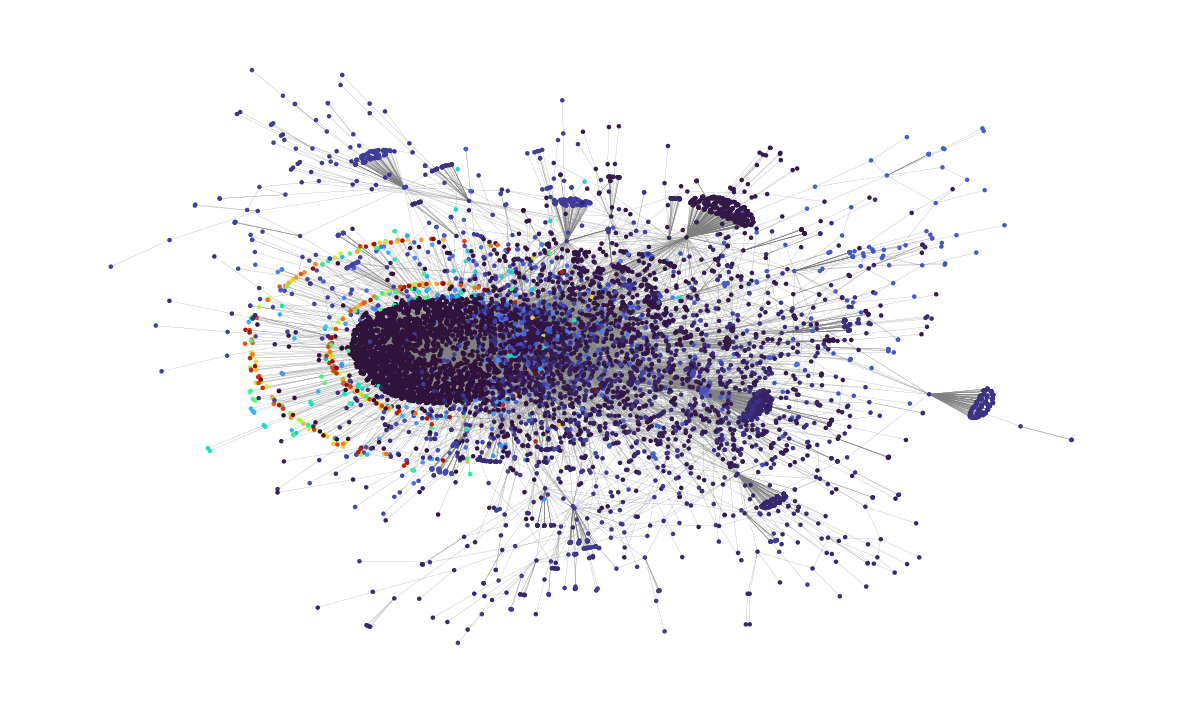

In [17]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, node_color=df_greedy['community'], cmap=plt.cm.turbo, edge_color='gray', node_size=5, with_labels=False, width=0.15)

### Louvain

Number of communities:  50

Community  1: Size 298
Community  2: Size 157
Community  3: Size 3
Community  4: Size 113
Community  5: Size 129
Community  6: Size 3
Community  7: Size 249
Community  8: Size 4
Community  9: Size 3
Community 10: Size 69
Community 11: Size 137
Community 12: Size 371
Community 13: Size 3
Community 14: Size 43
Community 15: Size 170
Community 16: Size 596
Community 17: Size 213
Community 18: Size 95
Community 19: Size 3
Community 20: Size 6
Community 21: Size 3
Community 22: Size 303
Community 23: Size 225
Community 24: Size 3
Community 25: Size 5
Community 26: Size 265
Community 27: Size 178
Community 28: Size 5
Community 29: Size 5
Community 30: Size 121
Community 31: Size 3
Community 32: Size 7
Community 33: Size 3
Community 34: Size 4
Community 35: Size 3
Community 36: Size 3
Community 37: Size 85
Community 38: Size 220
Community 39: Size 161
Community 40: Size 5
Community 41: Size 4
Community 42: Size 2938
Community 43: Size 3
Community 44: Size 90
Commun

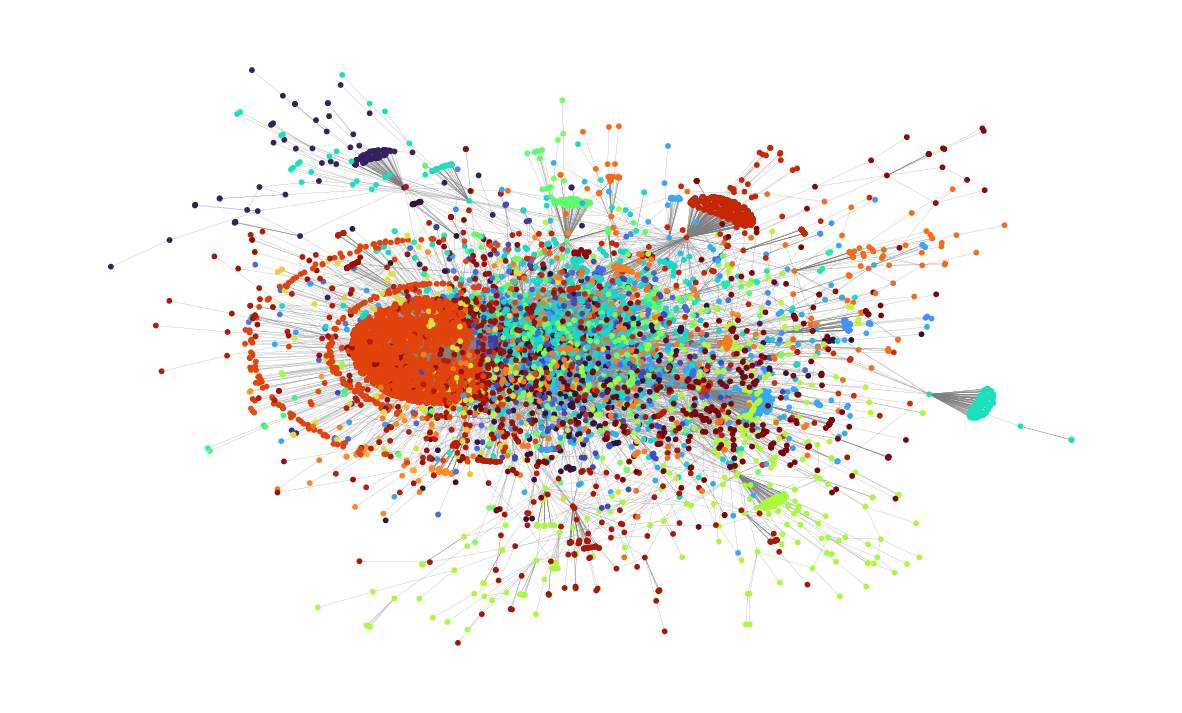

In [6]:
c_louvain = nx.community.louvain_communities(G)
df_louvain = community_detection(G, c_louvain)

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, node_color=df_louvain['community'], cmap=plt.cm.turbo, edge_color='gray', node_size= 10, with_labels= False, width= 0.15)

### FluidC

In [7]:
k_to_modularity = {}
for k in range(1, 26):
    c = list(nx.community.asyn_fluidc(G, k))
    modularity = nx.community.modularity(G, c)
    k_to_modularity[k] = modularity
    print(f"#communities = {k}, Modularity = {modularity:.4f}")

#communities = 1, Modularity = 0.0000
#communities = 2, Modularity = 0.3392
#communities = 3, Modularity = 0.4968
#communities = 4, Modularity = 0.4805
#communities = 5, Modularity = 0.5743
#communities = 6, Modularity = 0.4855
#communities = 7, Modularity = 0.4888
#communities = 8, Modularity = 0.4940
#communities = 9, Modularity = 0.5364
#communities = 10, Modularity = 0.5067
#communities = 11, Modularity = 0.5048
#communities = 12, Modularity = 0.4649
#communities = 13, Modularity = 0.4627
#communities = 14, Modularity = 0.5258
#communities = 15, Modularity = 0.4686
#communities = 16, Modularity = 0.4878
#communities = 17, Modularity = 0.4763
#communities = 18, Modularity = 0.5030
#communities = 19, Modularity = 0.4786
#communities = 20, Modularity = 0.4965
#communities = 21, Modularity = 0.4403
#communities = 22, Modularity = 0.4983
#communities = 23, Modularity = 0.4790
#communities = 24, Modularity = 0.4796
#communities = 25, Modularity = 0.4762


Number of communities:  5

Community  1: Size 2939
Community  2: Size 1057
Community  3: Size 3684
Community  4: Size 2
Community  5: Size 1180

Modularity: 0.5335


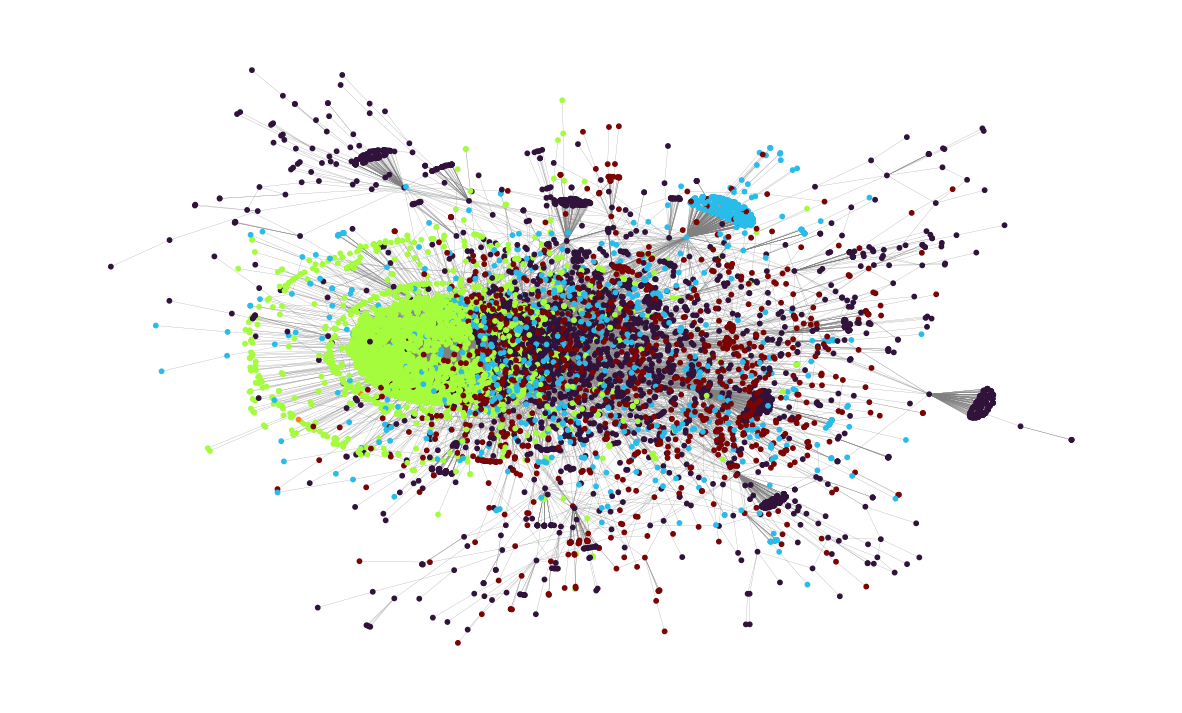

In [8]:
# the best k is the one with the highest modularity
top_k = max(k_to_modularity, key=k_to_modularity.get)
c_fluidc = list(nx.community.asyn_fluidc(G, k=top_k))
df_fluidc = community_detection(G, c_fluidc)

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, node_color=df_fluidc['community'], cmap=plt.cm.turbo, edge_color='gray', node_size= 10, with_labels= False, width= 0.15)

Clearly fluidc is not suited when we have a big difference in size between clusters.

## Infomap

In [9]:
# Create node mapping from string to integer
node_to_id = {node: i for i, node in enumerate(G.nodes())}

from infomap import Infomap
im = Infomap()
# Add nodes and edges to Infomap
for node in G.nodes():
    im.add_node(node_to_id[node])

for u, v in G.edges():
    im.add_link(node_to_id[u], node_to_id[v])

im.run()

# Create reverse mapping for partition
id_to_node = {i: node for node, i in node_to_id.items()}
partition = {id_to_node[node.node_id]: node.module_id for node in im.iterLeafNodes()}


  Infomap v2.8.0 starts at 2025-06-05 11:11:57
  -> Input network: 
  -> No file output!
  OpenMP 201511 detected with 16 threads...
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 8862 nodes and 12302 links...
  -> One-level codelength: 10.5775965

Trial 1/1 starting at 2025-06-05 11:11:57
Two-level compression: 34% 0.19% 0.032915437% 0.025097274% 0.00274629549% 0.00386569594% 
Partitioned to codelength 2.16771371 + 4.8304402 = 6.998153906 in 607 (606 non-trivial) modules.
Super-level compression: 1.06866397% to codelength 6.923367156 in 11 top modules.

Recursive sub-structure compression: 25.9186948% 0.915921663% 1.2946778e-14% . Found 4 levels with codelength 6.860227463

=> Trial 1/1 finished in 0.120995165s with codelength 6.86022746


Summary after 1 trial
Best end modular solution in 

In [10]:
# Convert partition dictionary to communities list format for community_detection function
communities = []
partition_values = set(partition.values())

for community_id in sorted(partition_values):
    community_nodes = [node for node, comm_id in partition.items() if comm_id == community_id]
    communities.append(community_nodes)

df_infomap = community_detection(G, communities)

Number of communities:  11

Community  1: Size 6492
Community  2: Size 608
Community  3: Size 454
Community  4: Size 300
Community  5: Size 259
Community  6: Size 229
Community  7: Size 164
Community  8: Size 148
Community  9: Size 114
Community 10: Size 78
Community 11: Size 16

Modularity: 0.3891


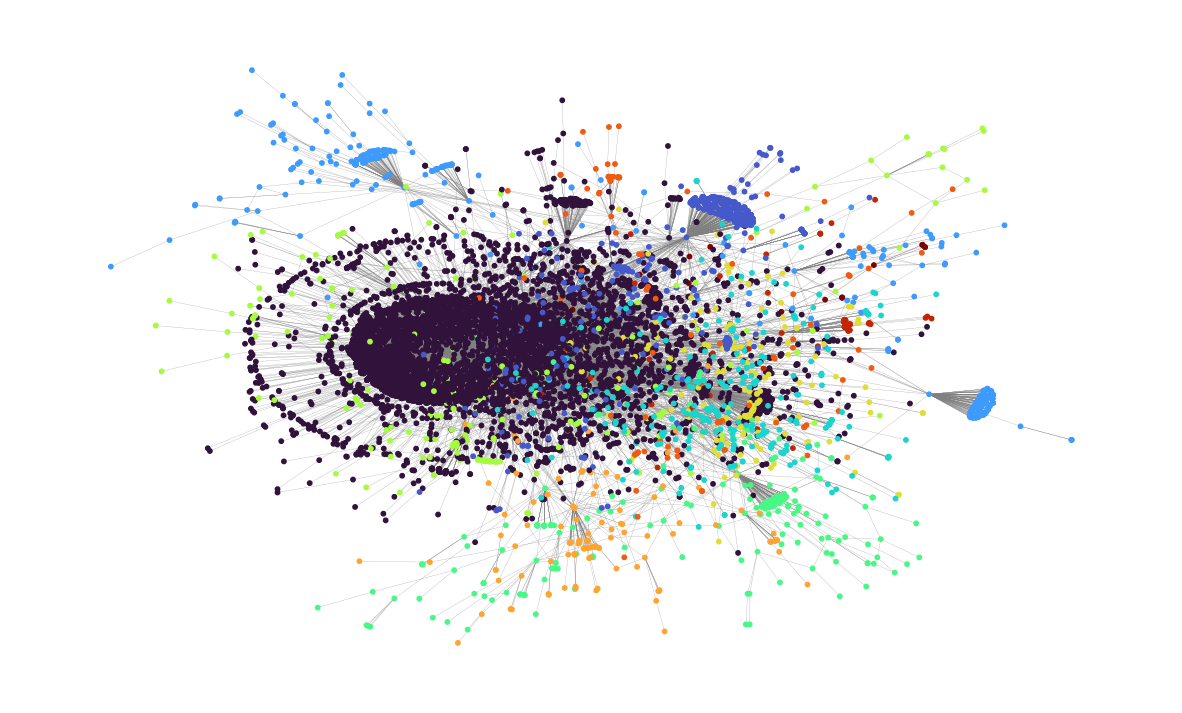

In [13]:
node_color = [partition[node] for node in G.nodes()]

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, node_color=node_color, cmap=plt.cm.turbo, edge_color='gray', node_size=10, with_labels=False, width=0.15)